# Data cleaning

---

## External packages

In [50]:
%matplotlib inline

import platform, sys
print(f"Python: {platform.platform()}, version: {sys.version[0:6]}")

import numpy as np
import pandas as pd
import seaborn as sns
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns.__version__}")

from sklearn import datasets
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

# plotting library
import matplotlib
import matplotlib.pyplot as plt 
print(f"matplotlib: {matplotlib.__version__}")

# ML-models library
import sklearn as sk
print(f"scikit-learn: {sk.__version__}")

# statistics library
import statsmodels
print(f"statsmodels: {statsmodels.__version__}")



Python: Windows-11-10.0.26100-SP0, version: 3.12.7
numpy: 1.26.4
pandas: 2.2.2
seaborn: 0.13.2
matplotlib: 3.9.2
scikit-learn: 1.5.1
statsmodels: 0.14.2


## Load dataset

In [ ]:
import os

def load_csv_pd_data(path, filename):
    '''
    load_csv_pd_data() - construct a pandas DataFrame object 
           from data in a Excel csv-file `filename`,
           stored in a folder `path`.
    @returns: a pandas DataFrame
    '''
    csv_path = os.path.join(path, filename)
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"{csv_path} does not exist")

    return pd.read_csv(csv_path, sep=';')


movies = load_csv_pd_data("input", "data_movies_clean.csv")

# Format fields.
movies['vote_average'] = movies['vote_average'].str.replace(',', '.').astype(float)
movies['budget'] = movies['budget'].str.replace(',', '.').astype(float)
movies['revenue'] = movies['revenue'].str.replace(',', '.').astype(float)
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%d/%m/%Y')

# Merge vote_average and vote_count.
C = movies['vote_average'].mean()                      # algemeen gemiddelde
m = movies['vote_count'].quantile(0.80)                # minimum drempel (80e percentiel)

v = movies['vote_count']
R = movies['vote_average']

movies['weighted_vote'] = np.where(
    (v > 0) & (R > 0),
    (v / (v + m)) * R + (m / (v + m)) * C,
    0
)

# Drop unused fields.
movies = movies.drop(['title', 'adult', 'popularity'], axis=1)
movies.info()

[' ', "'", ',', 'A', 'C', 'D', 'F', 'H', 'M', 'R', 'S', 'T', 'V', 'W', '[', ']', 'a', 'c', 'd', 'e', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'v', 'y']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946460 entries, 0 to 946459
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   id                        946460 non-null  int64         
 1   original_language         946460 non-null  object        
 2   origin_country            946460 non-null  object        
 3   release_date              946460 non-null  datetime64[ns]
 4   genre_names               946460 non-null  object        
 5   production_company_names  946460 non-null  object        
 6   budget                    946460 non-null  float64       
 7   revenue                   946460 non-null  float64       
 8   runtime                   946460 non-null  int64         
 9   vote_average              9464

---

## Exploration

583900000.0


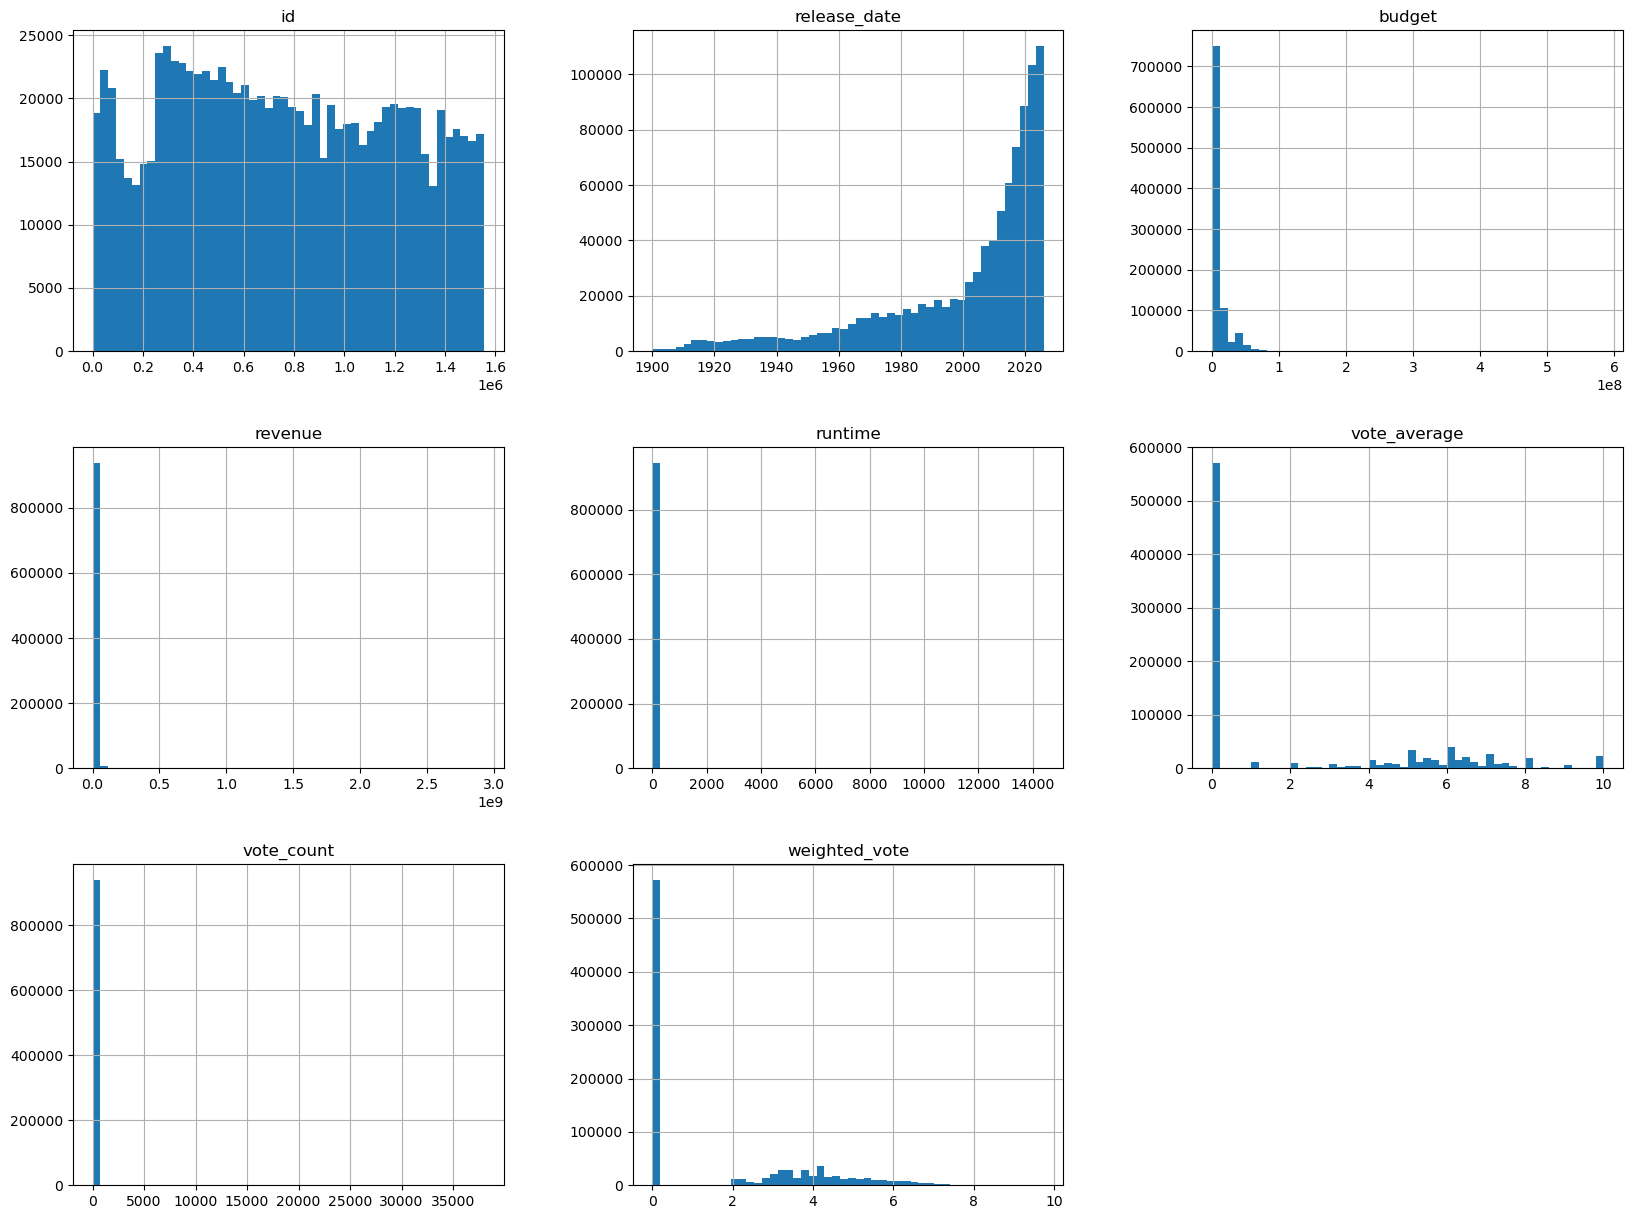

In [52]:
%matplotlib inline     

print(movies['budget'].max())


movies.hist(bins=50, figsize=(20,15))
plt.show() 

Hieruit zien we dat de null-waardes en andere outliers de gegevens zwaar beinvloeden. Het is daarom belangrijk dat we de data bewerken om de invloed van deze waardes te verminderen.

333389
Log=false


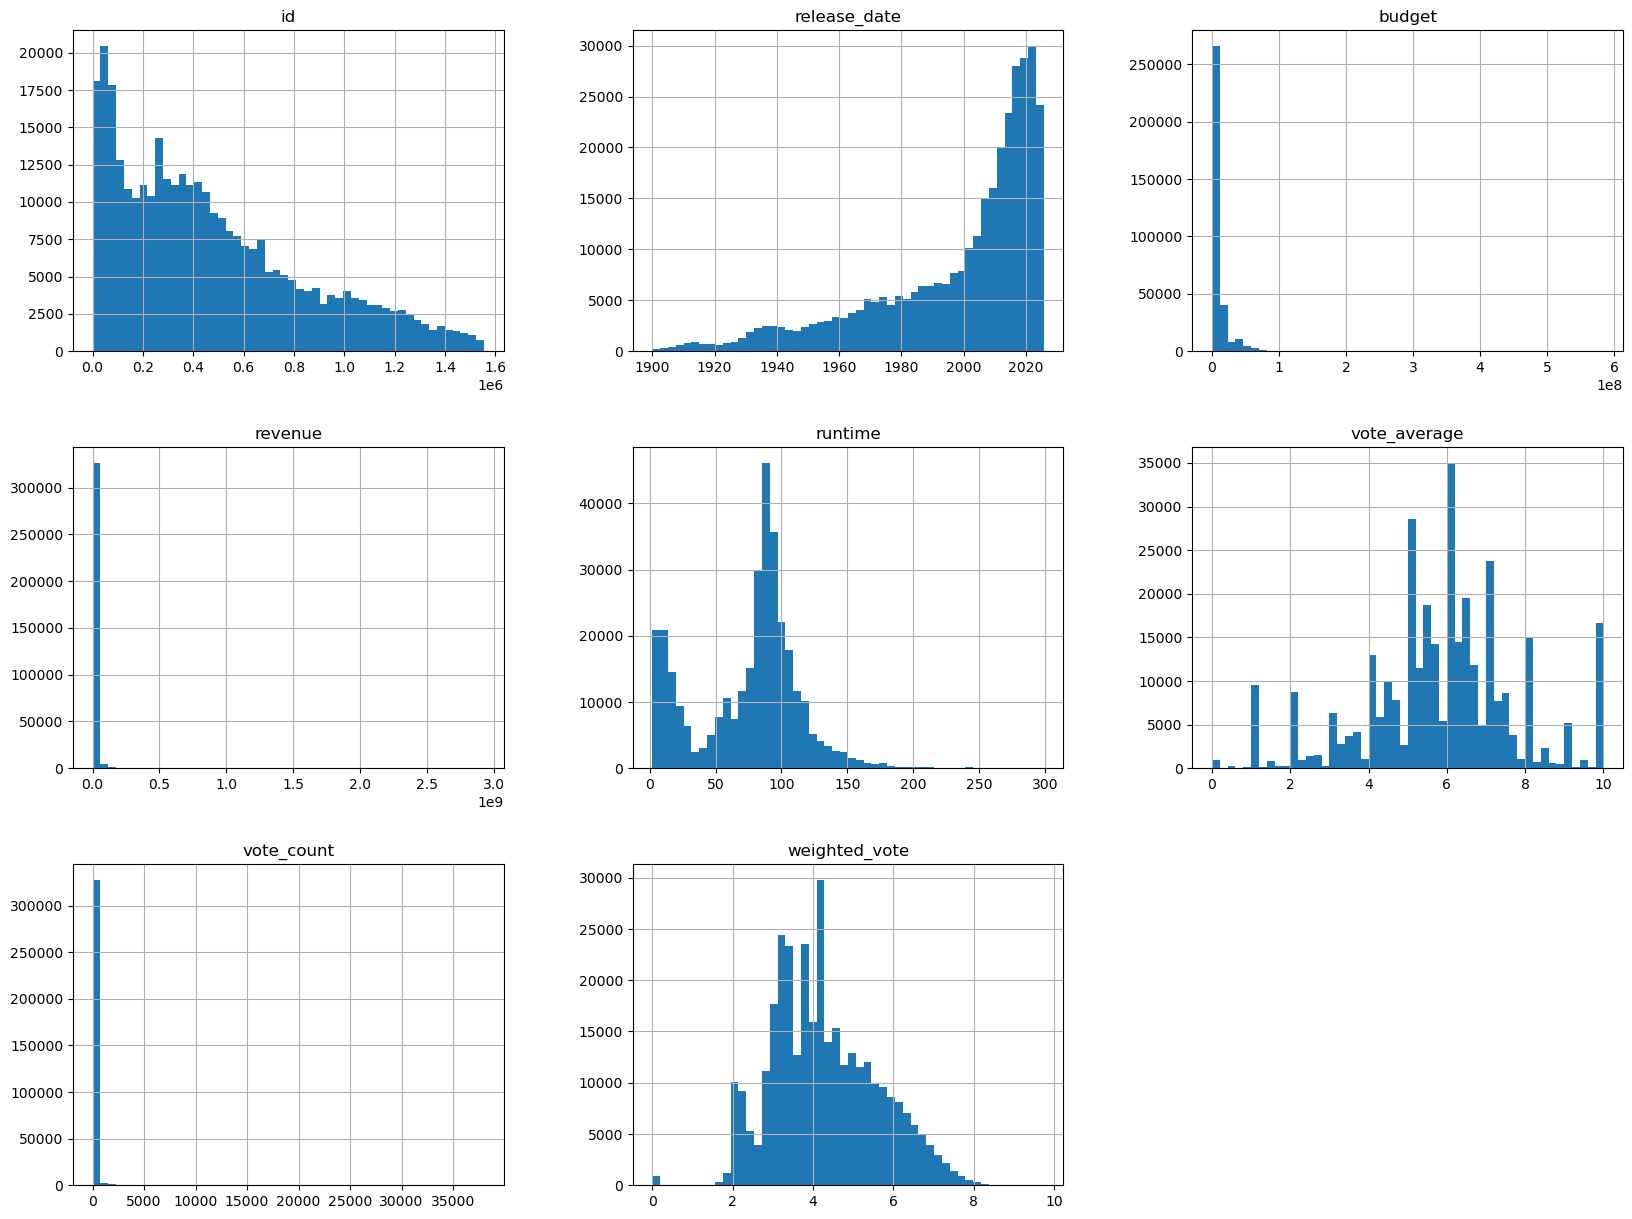

Log=true


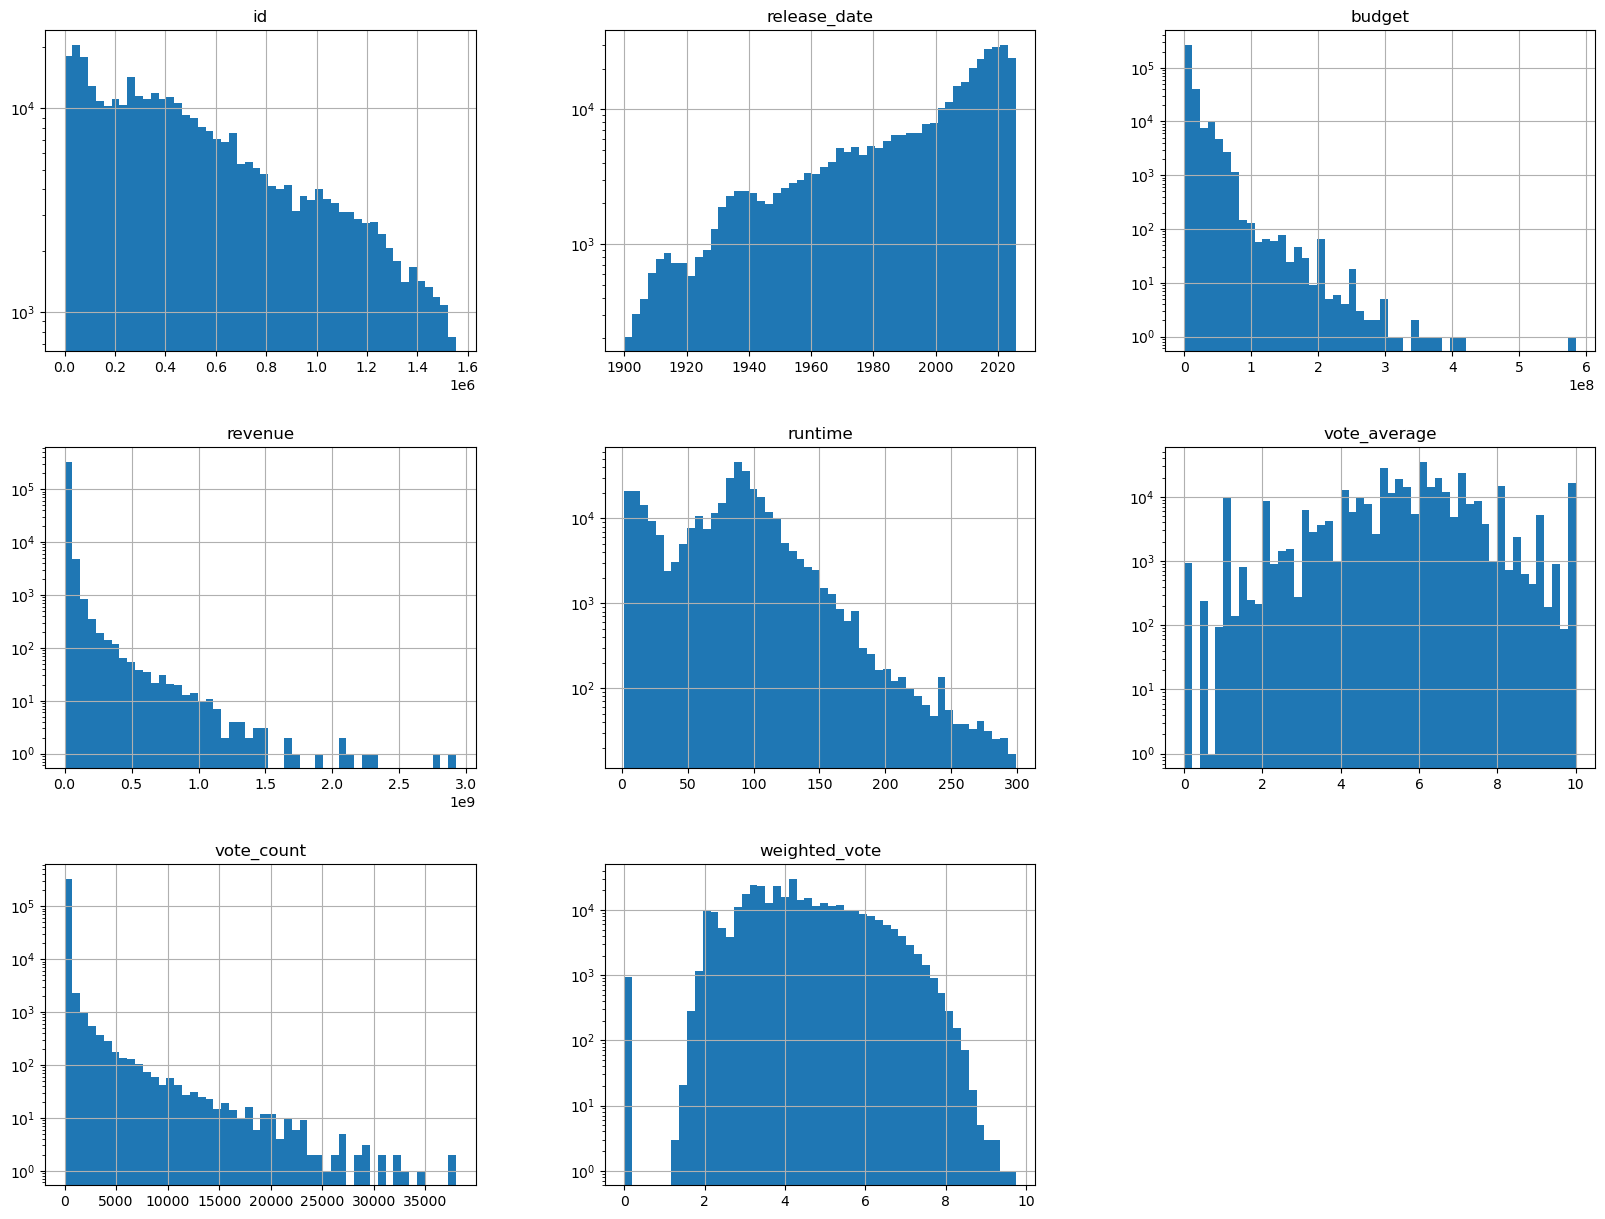

In [53]:
%matplotlib inline     

# Verwijder records waar runtime 0 of negatief is, of meer dan 300 minuten is.
movies.drop(movies[(movies['runtime'] <= 1) | (movies['runtime'] >= 300)].index, inplace=True)

# Verwijder records waar budget 1 of minder is.
movies.drop(movies[(movies['budget'] <= 1)].index, inplace=True)

# Je kan zien hoe revenue nog veel verschil heeft tussen de indie films, met outliers in de miljarden. 
# De grafiek is hierom biased. Echter is dit onze target dus is het minder relevant voor ons onderzoek.

# Dit gooit een heleboel records weg, van 750k naar 333k.
movies.drop(movies[(movies['vote_count'] < 1)].index, inplace=True)

print(len(movies))

print("Log=false")
movies.hist(bins=50, figsize=(20,15), log=False)
plt.show() 

print("Log=true")
movies.hist(bins=50, figsize=(20,15), log=True)
plt.show() 

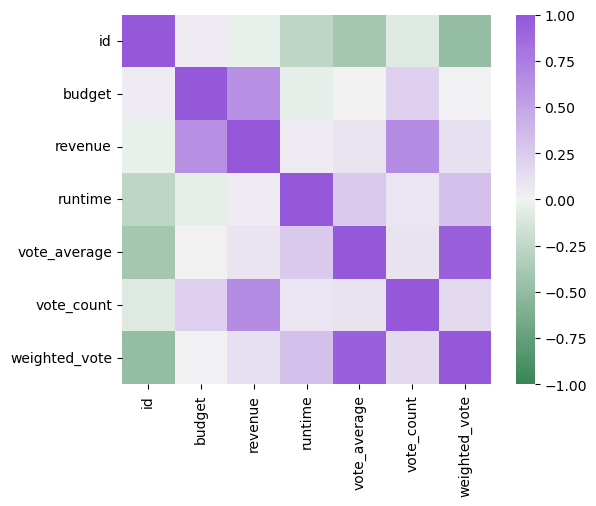

In [64]:
numeric_fields = movies.select_dtypes(include=['number'])

correlation = numeric_fields.corr()

axis_corr = sns.heatmap(correlation,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(500, 100000, n=500),
square=True
)

plt.show()
